# 05 Verteilungen
-------------------------------------------------------------------------

#### In diesem Notebook wird die Verteilung der Locations angeschaut, und es werden 3 Verteilungen visualisert.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
df = pd.read_csv('../data/Taxi_final_1M_clean.csv')
zones = pd.read_csv('../data/taxi_zones.csv')

df.shape, zones.shape

((967493, 17), (265, 4))

### Top 20 Locations

In [3]:
pickup_counts = df['PULocationID'].value_counts().head(20)
pickup_with_zones = pickup_counts.to_frame('count').join(
    zones.set_index('LocationID')[['Borough', 'Zone']]
)
pickup_with_zones['percentage'] = (pickup_with_zones['count'] / len(df) * 100).round(2)

dropoff_counts = df['DOLocationID'].value_counts().head(20)
dropoff_with_zones = dropoff_counts.to_frame('count').join(
    zones.set_index('LocationID')[['Borough', 'Zone']]
)
dropoff_with_zones['percentage'] = (dropoff_with_zones['count'] / len(df) * 100).round(2)

pickup_with_zones

,count,Borough,Zone,percentage
PULocationID,,,,
132,49758,Queens,JFK Airport,5.14
237,45624,Manhattan,Upper East Side South,4.72
161,45006,Manhattan,Midtown Center,4.65
236,41096,Manhattan,Upper East Side North,4.25
162,34569,Manhattan,Midtown East,3.57
186,33505,Manhattan,Penn Station/Madison Sq West,3.46
138,33296,Queens,LaGuardia Airport,3.44
230,32216,Manhattan,Times Sq/Theatre District,3.33
142,31993,Manhattan,Lincoln Square East,3.31


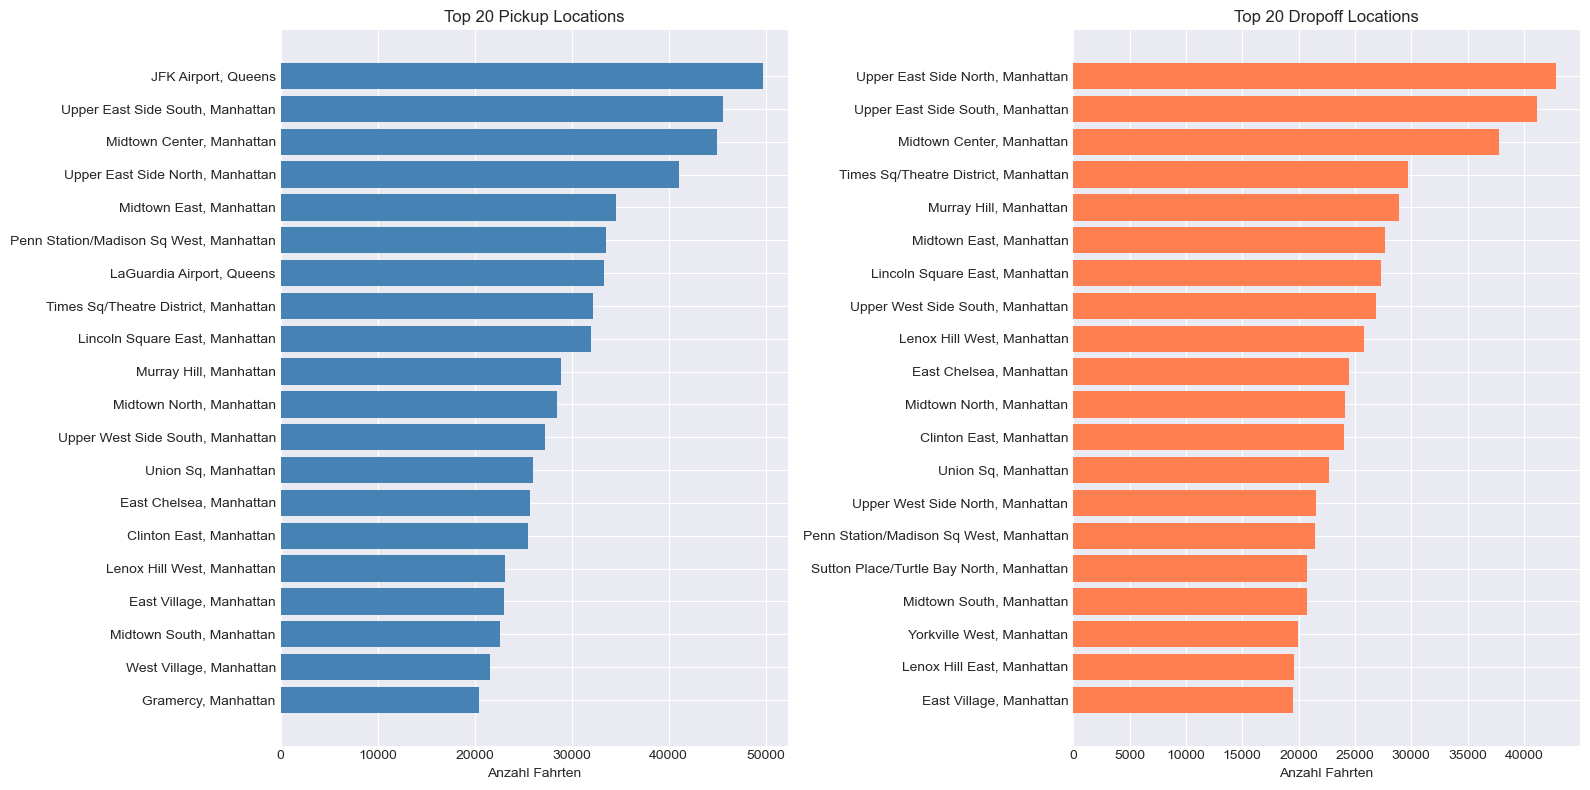

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].barh(range(len(pickup_with_zones)), pickup_with_zones['count'], color='steelblue')
axes[0].set_yticks(range(len(pickup_with_zones)))
axes[0].set_yticklabels([f"{row['Zone']}, {row['Borough']}" for _, row in pickup_with_zones.iterrows()])
axes[0].set_xlabel('Anzahl Fahrten')
axes[0].set_title('Top 20 Pickup Locations')
axes[0].invert_yaxis()

axes[1].barh(range(len(dropoff_with_zones)), dropoff_with_zones['count'], color='coral')
axes[1].set_yticks(range(len(dropoff_with_zones)))
axes[1].set_yticklabels([f"{row['Zone']}, {row['Borough']}" for _, row in dropoff_with_zones.iterrows()])
axes[1].set_xlabel('Anzahl Fahrten')
axes[1].set_title('Top 20 Dropoff Locations')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


In diesem Diagramm ist zu sehen, dass die top 20 Locations fast ausschliesslich Orte in Manhattan sind, mit einer Ausnahme für den JFK Airport in Queens. Dieser ist aber nur bei den Pickup Locations beliebt, für dropoff eher weniger. Eine visualisierung der Locations ist im Notebook 'Heatmap,ipynb' zu finden.

## Verteilungsanalyse

Hier werden 3 Verteilungen untersucht:
- Fahrdistanz
- Fahrpreis
- Fahrzeit

Es wird jeweils die empirische Verteilung mit einer überlagerten Log-Normal-Verteilung (rot) verglichen.

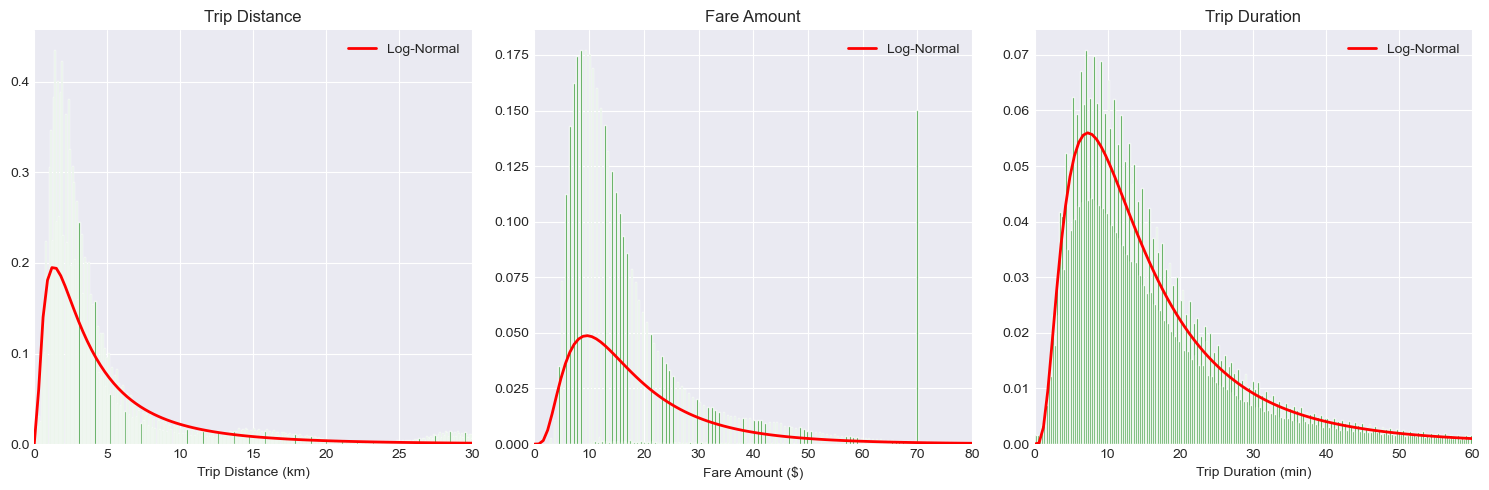

In [5]:
from scipy.stats import expon, lognorm, norm

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Trip Distance - Log-Normal
data = df['trip_distance']
data_filtered = data[data <= 30]
axes[0].hist(data_filtered, bins='fd', density=True, alpha=0.85, edgecolor='white', color='green')
shape, loc, scale = lognorm.fit(data, floc=0)
x = np.linspace(0, 30, 100)
axes[0].plot(x, lognorm.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-Normal')
axes[0].set_xlabel('Trip Distance (km)')
axes[0].set_xlim(0, 30)
axes[0].set_title('Trip Distance')
axes[0].legend()

# Fare Amount - Log-Normal
data = df['fare_amount']
data_filtered = data[data <= 80]
axes[1].hist(data_filtered, bins='fd', density=True, alpha=0.85, edgecolor='white', color='green')
shape, loc, scale = lognorm.fit(data, floc=0)
x = np.linspace(0, 80, 100)
axes[1].plot(x, lognorm.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-Normal')
axes[1].set_xlabel('Fare Amount ($)')
axes[1].set_xlim(0, 80)
axes[1].set_title('Fare Amount')
axes[1].legend()

# Trip Duration - Log-Normal
data = df['trip_duration']
data_filtered = data[data <= 60]
axes[2].hist(data_filtered, bins='fd', density=True, alpha=0.85, edgecolor='white', color='green')
shape, loc, scale = lognorm.fit(data, floc=0)
x = np.linspace(0, 60, 100)
axes[2].plot(x, lognorm.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-Normal')
axes[2].set_xlabel('Trip Duration (min)')
axes[2].set_xlim(0, 60)
axes[2].set_title('Trip Duration')
axes[2].legend()

plt.tight_layout()
plt.show()

##### Alle 3 Verteilungen sind rechtsschief und folgen approximativ einer Log-Normal-Verteilung. Das heisst dass die meisten Fahrten kurz und günstig sind, mit wenigen langen und teuren Fahrten. 